# Analisis de Dataset Google PlayStore

## En este notebook, vamos a analizar el conjunto de datos (tomado de Kaggle) de todas las aplicaciones en Google Play Store.

# 1. Procesos de analisis de datos
> ## Con este conjunto de datos, podemos predecir la calificación de una aplicación con datos dados. Además, hacer una prueba de hipótesis simple para ver si los juegos funcionan mejor que otras categorías. Para intentar predecir las calificaciones

> ### Los datos que manejaremos :

> ### NomApp : Es ek niombre de la aplicacion
| Categoría : la categoria a la que pertenece la aplicaion: famliar, game, sports..etct
| Calificación : es la aclificaion que se le da del 0 al 5 a una aplicaion 
| Reseñas: el numero de reseñas tanto malas como buenas eso no lo especirfica, solo nos da el total
| Tamaño : el tamaño de la app en MegasBytes
| Instalaciones : el numero de instalaciones 
| Tipo: el tipo si es gratis o si es de paga
| Precio : el precio
| Calificación_De_Contenido: el tipo de contenido: si es para todo tipo de publlico, si es para adultos, etc
| Género: es igual que la categoria     : 
| Última actualización : es la fecha de su ultima actualizacion
| Versión actual:: version de android actual 
| Ver Android: version de android que aceptan los dispositivos moviles

> ### Creo que no es necesario explicar cada una de los campos, porque su simple nombre basta 

 preprocesamiento, análisis, pruebas;
> #### 1.PROCESO DE ANALISIS DE DATOS (enteder problema)
> #### 2.LEER LOS DATOS
> #### 3. PREPROCESAMIENTO
    > #### -  3.1 Manejo de valores NULLs
    > #### -  3.2 Manejo de tipos y valores de datos
> #### 4. Analizando y vizualiazando nuestros datos
> #### 5. Modelo y Pruebas


# 2.  Leer los datos

### Importamos las librerias para nuestra lectura

In [5]:
import pandas as pd
import numpy as np

### Leemos el dataset


In [6]:
datos = pd.read_csv("C:/Users/Yuki/Desktop/Proyecto/googleplaystore.csv")
print(datos)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

# 3. PREPROCESAMIENTO

  ### 3.1 Manejo de valores NULLs

#### Este es un paso muy importante en cada análisis y modelo, mejora la precisión de los conocimientos y las predicciones de nuestros datos

In [7]:
print(datos.info())

print(datos.isnull().sum())  # mostramos el numero de nulls que tiene cada campo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                

> #### Habia muchos nulls en Rating, en Type, Content Rating y Versions.

#### reemplazando los valores NaN de la columna de Rating con la media

In [8]:
mean=datos["Rating"].mean()
datos["Rating"].fillna(mean,axis=0,inplace=True)


print(datos.info())
print(datos.isnull().sum())  # mostramos el numero de nulls que tiene cada campo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             

#### Por ultimo borraremos las filas NaN restantes

In [9]:
datos.dropna(axis=0,inplace=True)


print(datos.info())
print(datos.isnull().sum())  # mostramos el numero de nulls que tiene cada campo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB
None
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             

###  3.2 Manejo de tipos y valores de los datos

> ### Cambiamos los datos a un formato adecuado que se pueda utilizar para el análisis.

In [10]:
print(datos.dtypes)  # observemos los tipos que tiene cada campo

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


>#### obesermoa que el campo Review debe cambiarse a tipo numerico

In [11]:
datos.Reviews = datos.Reviews.astype('int64') #Camibamos el tipo de dato
print(datos.Reviews)

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10829, dtype: int64


>#### Otros campos como Size, Installs,Price y Android Ver también deben ser de tipo numérico.
Los valores que tienen deben cambiarse a un formato adecuado para que podamos usarlos para análisis y gráficos.

Ejemplo: En el campo Installs los valores son de tipo: '10000+' y debden cambiarse:  10000

#### Cambiando la clase : Installs

In [12]:
# Limpizamos y cambiamos la clase Installs
datos.Installs=datos.Installs.apply(lambda x: x.strip('+'))
datos.Installs=datos.Installs.apply(lambda x: x.replace(',',''))
datos.Installs=datos.Installs.replace('Free',np.nan)
datos["Installs"]=datos["Installs"].astype(int)


print(datos.Installs)



0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10829, dtype: int32


#### Cambiando la clase : Size

In [13]:
#Limpiando la clase Size 
datos.Size=datos.Size.replace( to_replace='k',value='e+3',regex=True)
datos.Size=datos.Size.replace('M','e+6',regex=True)
datos.Size=datos.Size.replace('Varies with device',np.nan)
datos.Size=datos.Size.replace('1,000+',1000)
datos["Size"].dropna(inplace=True)
datos.Size=datos.Size.astype(float)


#Remplamos los valores NaN por la media
mean=datos["Size"].mean()
datos["Size"].fillna(mean,inplace=True)

print(datos.Size)


0        1.900000e+07
1        1.400000e+07
2        8.700000e+06
3        2.500000e+07
4        2.800000e+06
             ...     
10836    5.300000e+07
10837    3.600000e+06
10838    9.500000e+06
10839    2.153496e+07
10840    1.900000e+07
Name: Size, Length: 10829, dtype: float64


#### Cambiando la clase : Price

In [14]:
# Limpiando la clase Price
datos.Price=datos.Price.apply(lambda x: x.replace('$',''))
datos.Price=datos.Price.astype(float)

print(datos.Price)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10829, dtype: float64


>#### Verificamos que se hayan cambiado los tipos de datos

In [15]:
print(datos.dtypes) 

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


#### Borramos algunas clases para nuestro que nuestro analisis sea mejor

In [16]:
#Eliminamo columnas que no son importantes para nuestro analisis
#Dado que para predecir el rating de una app, si o si se necesta lo que son los reviews, las installaciones, el tamaño, el precio, y tipode contenido
# y no asi el nombre de la app, el genero y la categoria o fechas o las versiones de android para saber si una app va a tener 
# una nota aceptable en su reting
# por lo que pienso que borrar esas clases, viendo un analisis de lo que ven los clientes en una app a la hora de instalarlos o de usarlos
datos.drop(["App","Genres","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

print(datos)

                  Category    Rating  Reviews          Size  Installs  Type  \
0           ART_AND_DESIGN  4.100000      159  1.900000e+07     10000  Free   
1           ART_AND_DESIGN  3.900000      967  1.400000e+07    500000  Free   
2           ART_AND_DESIGN  4.700000    87510  8.700000e+06   5000000  Free   
3           ART_AND_DESIGN  4.500000   215644  2.500000e+07  50000000  Free   
4           ART_AND_DESIGN  4.300000      967  2.800000e+06    100000  Free   
...                    ...       ...      ...           ...       ...   ...   
10836               FAMILY  4.500000       38  5.300000e+07      5000  Free   
10837               FAMILY  5.000000        4  3.600000e+06       100  Free   
10838              MEDICAL  4.193338        3  9.500000e+06      1000  Free   
10839  BOOKS_AND_REFERENCE  4.500000      114  2.153496e+07      1000  Free   
10840            LIFESTYLE  4.500000   398307  1.900000e+07  10000000  Free   

       Price Content Rating  
0        0.0       Ev

# 4. Analizando y vizualizando nuestros datos 

## Una vez limpios nuestros datos 

In [17]:
#Importamos algunas librerias para visualizar los dotas

import matplotlib.pyplot as plt
import seaborn as sns

## Analisamos la clase Category

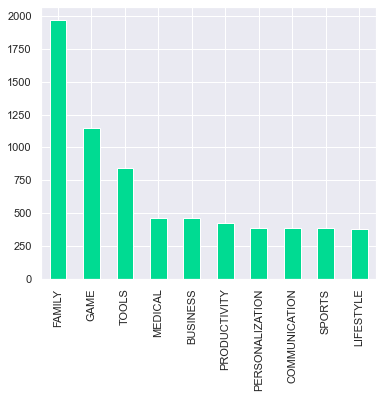

In [18]:
#podemos observar el la categoria mas popular
plt.figure(figsize=(6,5))
sns.set(style="darkgrid",palette="winter_r")
datos["Category"].value_counts().head(10).plot.bar()

>#### Observamos que la catergoria mas popular es FAMILY 

## Analisamos la clase Type

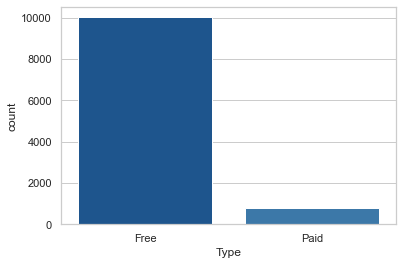

In [19]:
#COntamos las aplicaiones que son Gratis o De paga
sns.set(style="whitegrid",palette="Blues_r")
sns.countplot(datos["Type"])

>#### Observamos que la mayoria de las aplicaiones son Gratis 

## Analisamos la clase Content Rating

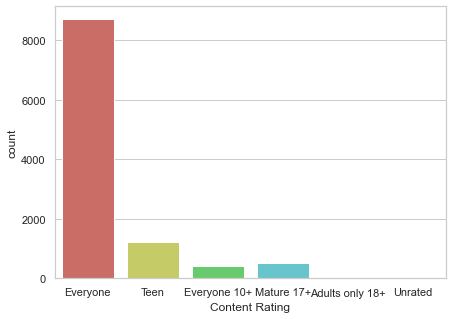

In [20]:
#Distribucion de los tipos de conteido 
plt.figure(figsize=(7,5))
sns.set(style="whitegrid",palette="hls")
sns.countplot(datos["Content Rating"])

>#### Observamos que la mayorias de las aplicaiones son de Tipo "Para todos "

## Analisamos la clase Rating

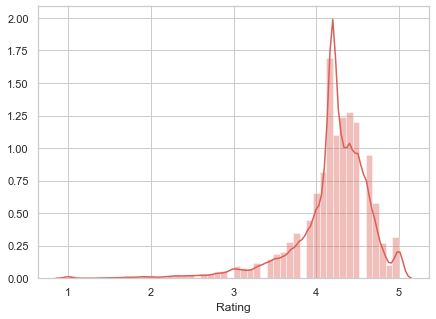

In [21]:
#Distribucion del Rating
plt.figure(figsize=(7,5))
sns.distplot(datos["Rating"])

>#### Observamos que Rating podria set una clase importante par nuestro analisis

## Analizamos la clase Size

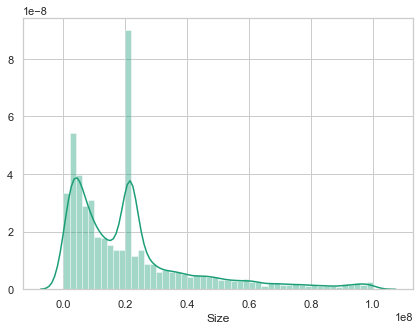

In [22]:
#Distribucion
plt.figure(figsize=(7,5))
sns.set(style="whitegrid",palette="Dark2")
sns.distplot(datos["Size"])

In [23]:
>#### la clase Size pdoria ser ipmortante para nuestro analisi

SyntaxError: invalid syntax (<ipython-input-23-9cfa8aa5d773>, line 1)

In [ ]:
#comprobando la correlación entre nuestras clases
plt.figure(figsize=(9,7))
sns.heatmap(datos.corr(),annot=True,cmap="summer")

#### Ahora, observando los datos podriamos hacer nuestras predicciones en Rating en función de otras clases
##### Eliminairmos la clase Category por que pienso que no es un clase importante para nuestra analisis 

In [24]:
#Eliminando la clase Category
datos.drop("Category",axis=1,inplace=True)
print(datos)

         Rating  Reviews          Size  Installs  Type  Price Content Rating
0      4.100000      159  1.900000e+07     10000  Free    0.0       Everyone
1      3.900000      967  1.400000e+07    500000  Free    0.0       Everyone
2      4.700000    87510  8.700000e+06   5000000  Free    0.0       Everyone
3      4.500000   215644  2.500000e+07  50000000  Free    0.0           Teen
4      4.300000      967  2.800000e+06    100000  Free    0.0       Everyone
...         ...      ...           ...       ...   ...    ...            ...
10836  4.500000       38  5.300000e+07      5000  Free    0.0       Everyone
10837  5.000000        4  3.600000e+06       100  Free    0.0       Everyone
10838  4.193338        3  9.500000e+06      1000  Free    0.0       Everyone
10839  4.500000      114  2.153496e+07      1000  Free    0.0     Mature 17+
10840  4.500000   398307  1.900000e+07  10000000  Free    0.0       Everyone

[10829 rows x 7 columns]


#### Hacemos un ultimo preprecesamiento por lo anterior visto en el analiusis de datos

In [25]:
# importamos librerias y categorizamos las clases Type, Content Rating
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


datos['Type'] = labelencoder.fit_transform(datos['Type'])
print(datos.Type)


datos['Content Rating'] = labelencoder.fit_transform(datos['Content Rating'])
print(datos['Content Rating'])

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Type, Length: 10829, dtype: int32
0        1
1        1
2        1
3        4
4        1
        ..
10836    1
10837    1
10838    1
10839    3
10840    1
Name: Content Rating, Length: 10829, dtype: int32


### Estandarizamos por lo visto anteriormente en nuesro analisis y visuzalicion de datos

In [26]:
XX = datos.drop(columns=['Rating'],axis=1)
yy = datos.loc[:,'Rating']
yy=yy.astype(int)


from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(XX)
rescX = scaler.transform(XX) 


# 5. Modelo y Pruebas

##### Impoertamos las librerias neceasrias

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix


##### Para los 10 splits 

In [28]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=0)
sss.get_n_splits(rescX, yy)


10

###### Iteramos nuestros 10 splits  y hacemos pruebas

In [29]:
i=1
for train_index, test_index in  sss.split(rescX, yy):
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Split: ',i,'<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    Xtrain, Xtest = rescX[train_index], rescX[test_index]
    ytrain, ytest = yy.values[train_index], yy.values[test_index]
  
    # Modelos
    randomf = RandomForestClassifier(random_state=0)
    gnb = GaussianNB()
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,  hidden_layer_sizes=(5, 2), random_state=300,max_iter=500)
    
    sk_clasificador = {'GaussianNB':gnb,
                       'RandomForest':randomf,
                       'MLP': clf}
    
    for clasifier in sk_clasificador:
        estimador = sk_clasificador[clasifier]
        
        estimador.fit(Xtrain, ytrain)
        
        #Pruebas
        ypred = estimador.predict(Xtest)
        
        print('********TEST********')
        print(ytest)
        print('*******PREDICT******')
        print(ypred)
        print('Nro Pred Correctos: ',sum(np.array(ytest)==np.array(ypred)),' de ', len(ytest))
        score = cross_val_score(estimador, rescX, yy, scoring='accuracy', cv=[(train_index, test_index)])
        print('************Matriz Confusion*************')
        print(confusion_matrix(ytest,ypred))
        print('************Score******************')
        print(estimador, score)
        print('###############################################')
    
    i+=1
    print('\n')

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Split:  1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
********TEST********
[4 3 3 ... 4 4 4]
*******PREDICT******
[4 2 5 ... 5 3 5]
Nro Pred Correctos:  1157  de  5415
************Matriz Confusion*************
[[   4    5    0    0   19]
 [  31   29    2    0   54]
 [ 153  355  122   21  204]
 [ 338 1201  686  865 1189]
 [   0    0    0    0  137]]
************Score******************
GaussianNB() [0.21366574]
###############################################
********TEST********
[4 3 3 ... 4 4 4]
*******PREDICT******
[4 3 4 ... 4 4 4]
Nro Pred Correctos:  4110  de  5415
************Matriz Confusion*************
[[   0    0    5   23    0]
 [   0    8   21   85    2]
 [   0    9  194  645    7]
 [   6   29  307 3891   46]
 [   0    1    6  113   17]]
************Score******************
RandomForestClassifier(random_state=0) [0.75900277]
###############################################
********TEST********
[4 3 3 ... 4 4 4]
*******PREDICT******
[4 4 4 ..

************Matriz Confusion*************
[[   0    0    0   28    0]
 [   0    0    0  116    0]
 [   0    0    0  855    0]
 [   0    0    0 4279    0]
 [   0    0    0  137    0]]
************Score******************
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=500,
              random_state=300, solver='lbfgs') [0.79021237]
###############################################


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Split:  7 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
********TEST********
[3 3 4 ... 4 4 1]
*******PREDICT******
[3 1 2 ... 5 2 5]
Nro Pred Correctos:  1266  de  5415
************Matriz Confusion*************
[[   5    1    0    0   22]
 [  44   17    3    0   52]
 [ 213  222  205   23  192]
 [ 495  627 1068  903 1186]
 [   1    0    0    0  136]]
************Score******************
GaussianNB() [0.23379501]
###############################################
********TEST********
[3 3 4 ... 4 4 1]
*******PREDICT******
[4 3 4 ... 4 4 4]
Nro Pred Correctos:  4118 

# Conclusiones
>### Todos los modelos no pudieron aprender los patrones de manera muy efectiva llegando a un max de 0.79 sin embargo hay un buen numero de predicciones, es decir, los datos en sí parecen no tener patrones. Esto podría deberse a conexiones débiles entre los datos. Es posible que agregar más clases relevantes ayude a mejorar la precisión del los modelos .